# Executed by : Rishabh Jain
    rishy.jain2000@gmail.com

# Importing Libraries


---



---



In [1]:
import numpy as np
import pandas as pd

# Creating DataFrame

---



---



In [10]:
df=pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')

# **Data Preparation and Cleaning **
    
  Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a recordset, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

---



---



* Data Cleansing

In [11]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [12]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [13]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
df.iloc[:,0]

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object

In [15]:
df.shape

(10841, 13)

In [16]:
df.ndim

2

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
# Checking Null Values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] =df.isnull().sum()
    temp['unique_count'] =df.nunique()
    return temp

In [20]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [21]:
df[df.Rating.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [22]:
df[df.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [23]:
df.Type.fillna('Free',inplace=True)

In [24]:
df[['Type']]

,Type
0,Free
1,Free
2,Free
3,Free
4,Free
...,...
10836,Free
10837,Free
10838,Free
10839,Free


In [25]:
df[df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
df.dropna(subset = ['Content Rating'], inplace=True)

In [27]:
df['Content Rating'][10470:10474,]

10470    Everyone
10471    Everyone
10473    Everyone
10474    Everyone
Name: Content Rating, dtype: object

In [28]:
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [29]:
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [30]:
# these are not required columns ,so drop them .
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [31]:
# Now, we can fix the Rating column which contains a total of 1474 of missing 
#values. Replacing the missing values with the Modevalue of that entire column.
modeValue = df['Rating'].mode()

In [32]:
df['Rating'].fillna(value=modeValue[0], inplace = True)

  Finally, after fixing all the missing values, we should have a look at our data frame

In [33]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


* All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.


---



---



In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


* Data Preparation


---



---



  * "Columns like Reviews, Size, Installs, & priceshould have an intor floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type."

In [35]:
# Reviews column
df['Reviews'] = df.Reviews.astype(int)

In [36]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


* "Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & 

* also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float ."

In [37]:
# Removing the + Sign
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

In [38]:
# For removing the `,`
df.Size.apply(lambda x: x.replace(',', ''))

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [39]:
# For converting the M to Mega
df['Size'] =df.Size.apply(lambda x: x.replace('M', 'e+6'))

In [40]:
# For convertinf the K to Kilo
df['Size'] =df.Size.apply(lambda x: x.replace('k', 'e+3'))

In [41]:
#Replacing the Varies with device value with Nan
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [42]:
#Now, finally converting all these values to numeric type
df['Size'] = pd.to_numeric(df['Size']) 

In [43]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [44]:
df.dropna(subset = ['Size'], inplace=True)

In [46]:
# To convert this column from object to integer type. 
#First of all, we will need to remove the +symbol from these values.
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))

In [47]:
#let’s remove the , symbol from the numbers
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))

In [48]:
# Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.
df['Installs'] = pd.to_numeric(df['Installs'])

In [49]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [50]:
#now we are only left with the Price column
df['Price'].value_counts()

0         8421
$0.99      145
$2.99      114
$1.99       66
$4.99       65
          ... 
$1.96        1
$3.28        1
$74.99       1
$15.99       1
$25.99       1
Name: Price, Length: 87, dtype: int64

" The values contain a special symbol $ which can be removed and then converted to the numeric type."

In [51]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

In [53]:
df['Price'] = pd.to_numeric(df['Price'])

In [54]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


* Now, we are finally done. In this section Data Preparation and Cleaning. We can see that the original dataset contained 10841 Rows and 13 Columns. It contained App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Curernt Ver, and Android VerColumns. But after cleansing the dataset and dropping the unwanted rows and columns having Null Values and Garbage data from the data frame, we are left with 8434 Rows and 10 Columns. *


---



---



---



# **Exploratory Analysis and Visualization**

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. 

In [55]:
!pip install klib

     |████████████████████████████████| 22.3 MB 995 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [56]:
import klib

In [57]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

GridSpec(6, 5)

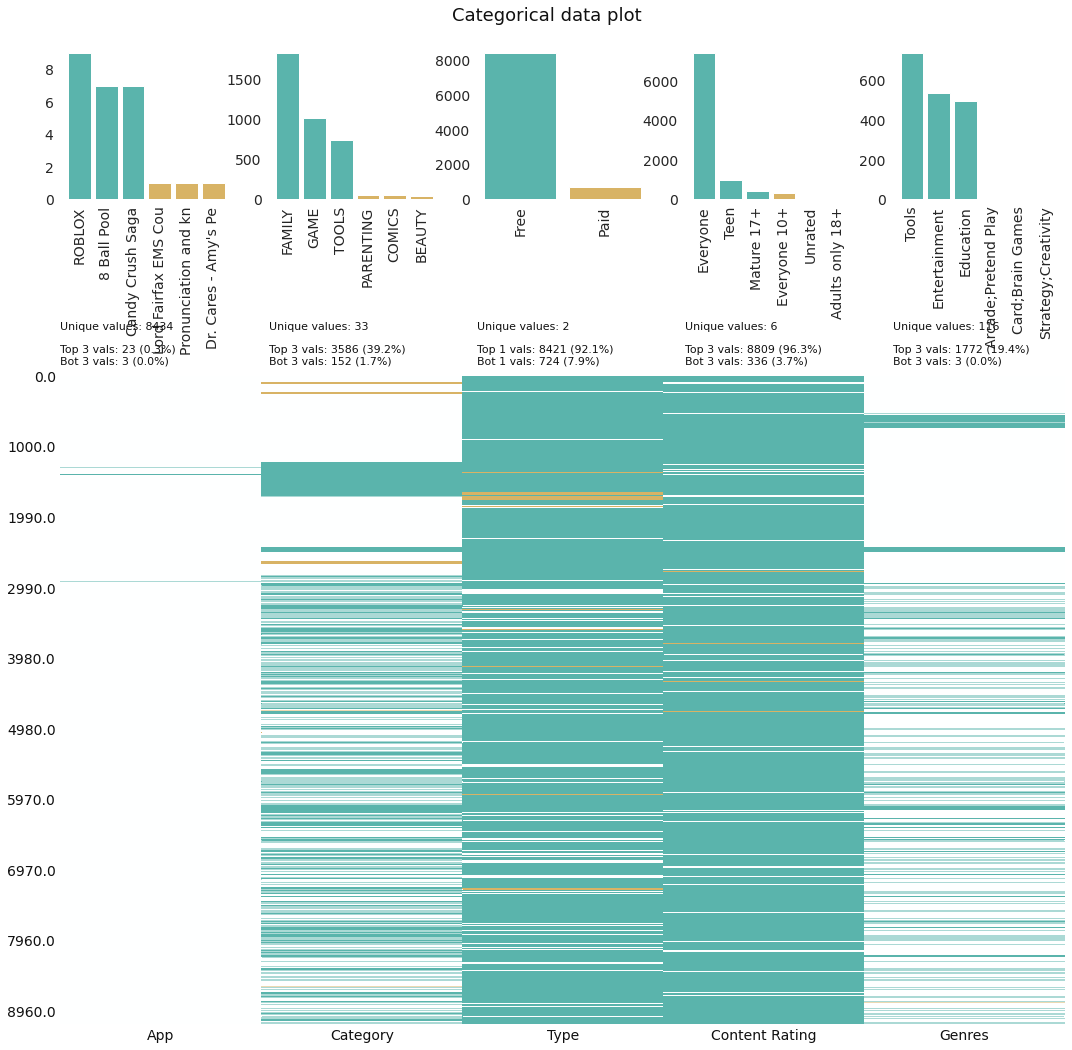

In [84]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

In [85]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

,Rating,Reviews,Size,Installs,Price
Rating,1.00,0.07,0.05,0.04,-0.02
Reviews,0.07,1.00,0.24,0.63,-0.01
Size,0.05,0.24,1.00,0.16,-0.02
Installs,0.04,0.63,0.16,1.00,-0.01
Price,-0.02,-0.01,-0.02,-0.01,1.00


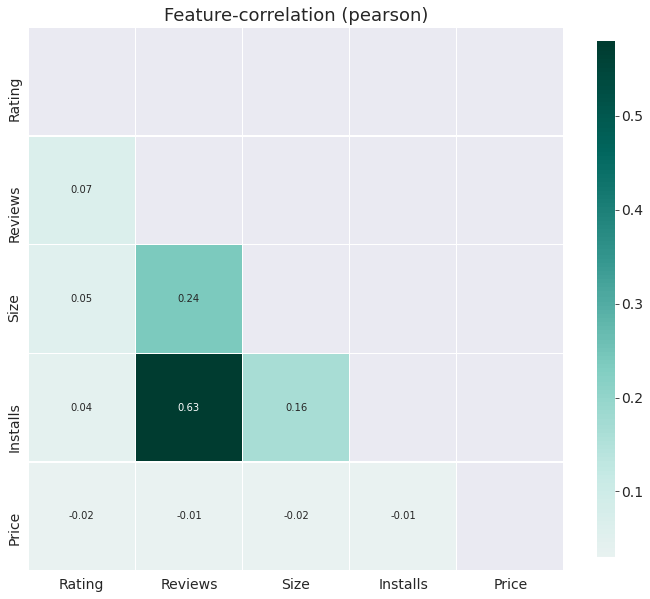

In [86]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

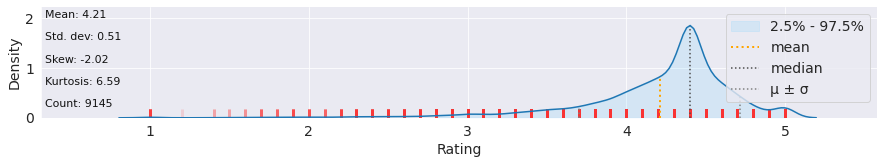

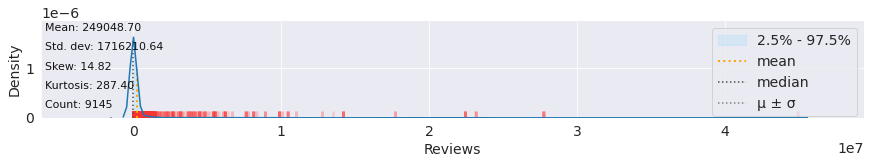

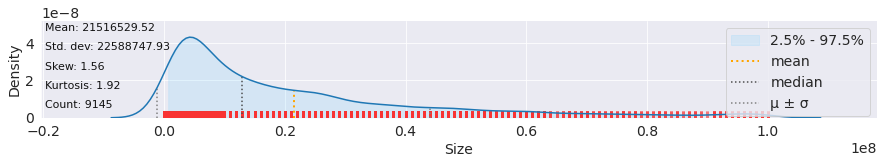

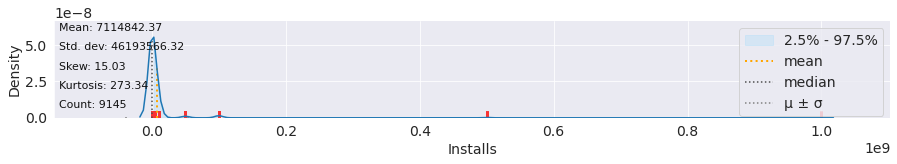

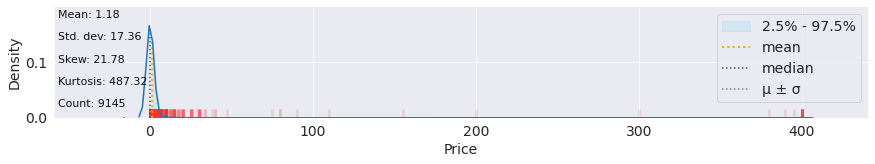

In [87]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

In [88]:
klib.missingval_plot(df) # returns a figure containing information about missing values

No missing values found in the dataset.


*  top categories in the play store, which contains the highest number of apps

In [89]:
klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

,App,Reviews,Size,pooled_vars
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,19000000.0,0
1,Coloring book moana,967,14000000.0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700000.0,2
3,Sketch - Draw & Paint,215644,25000000.0,3
4,Pixel Draw - Number Art Coloring Book,967,2800000.0,4
...,...,...,...,...
9140,FR Forms,0,9600000.0,5127
9141,Sya9a Maroc - FR,38,53000000.0,5456
9142,Fr. Mike Schmitz Audio Teachings,4,3600000.0,7239
9143,Parkinson Exercices FR,3,9500000.0,2342


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


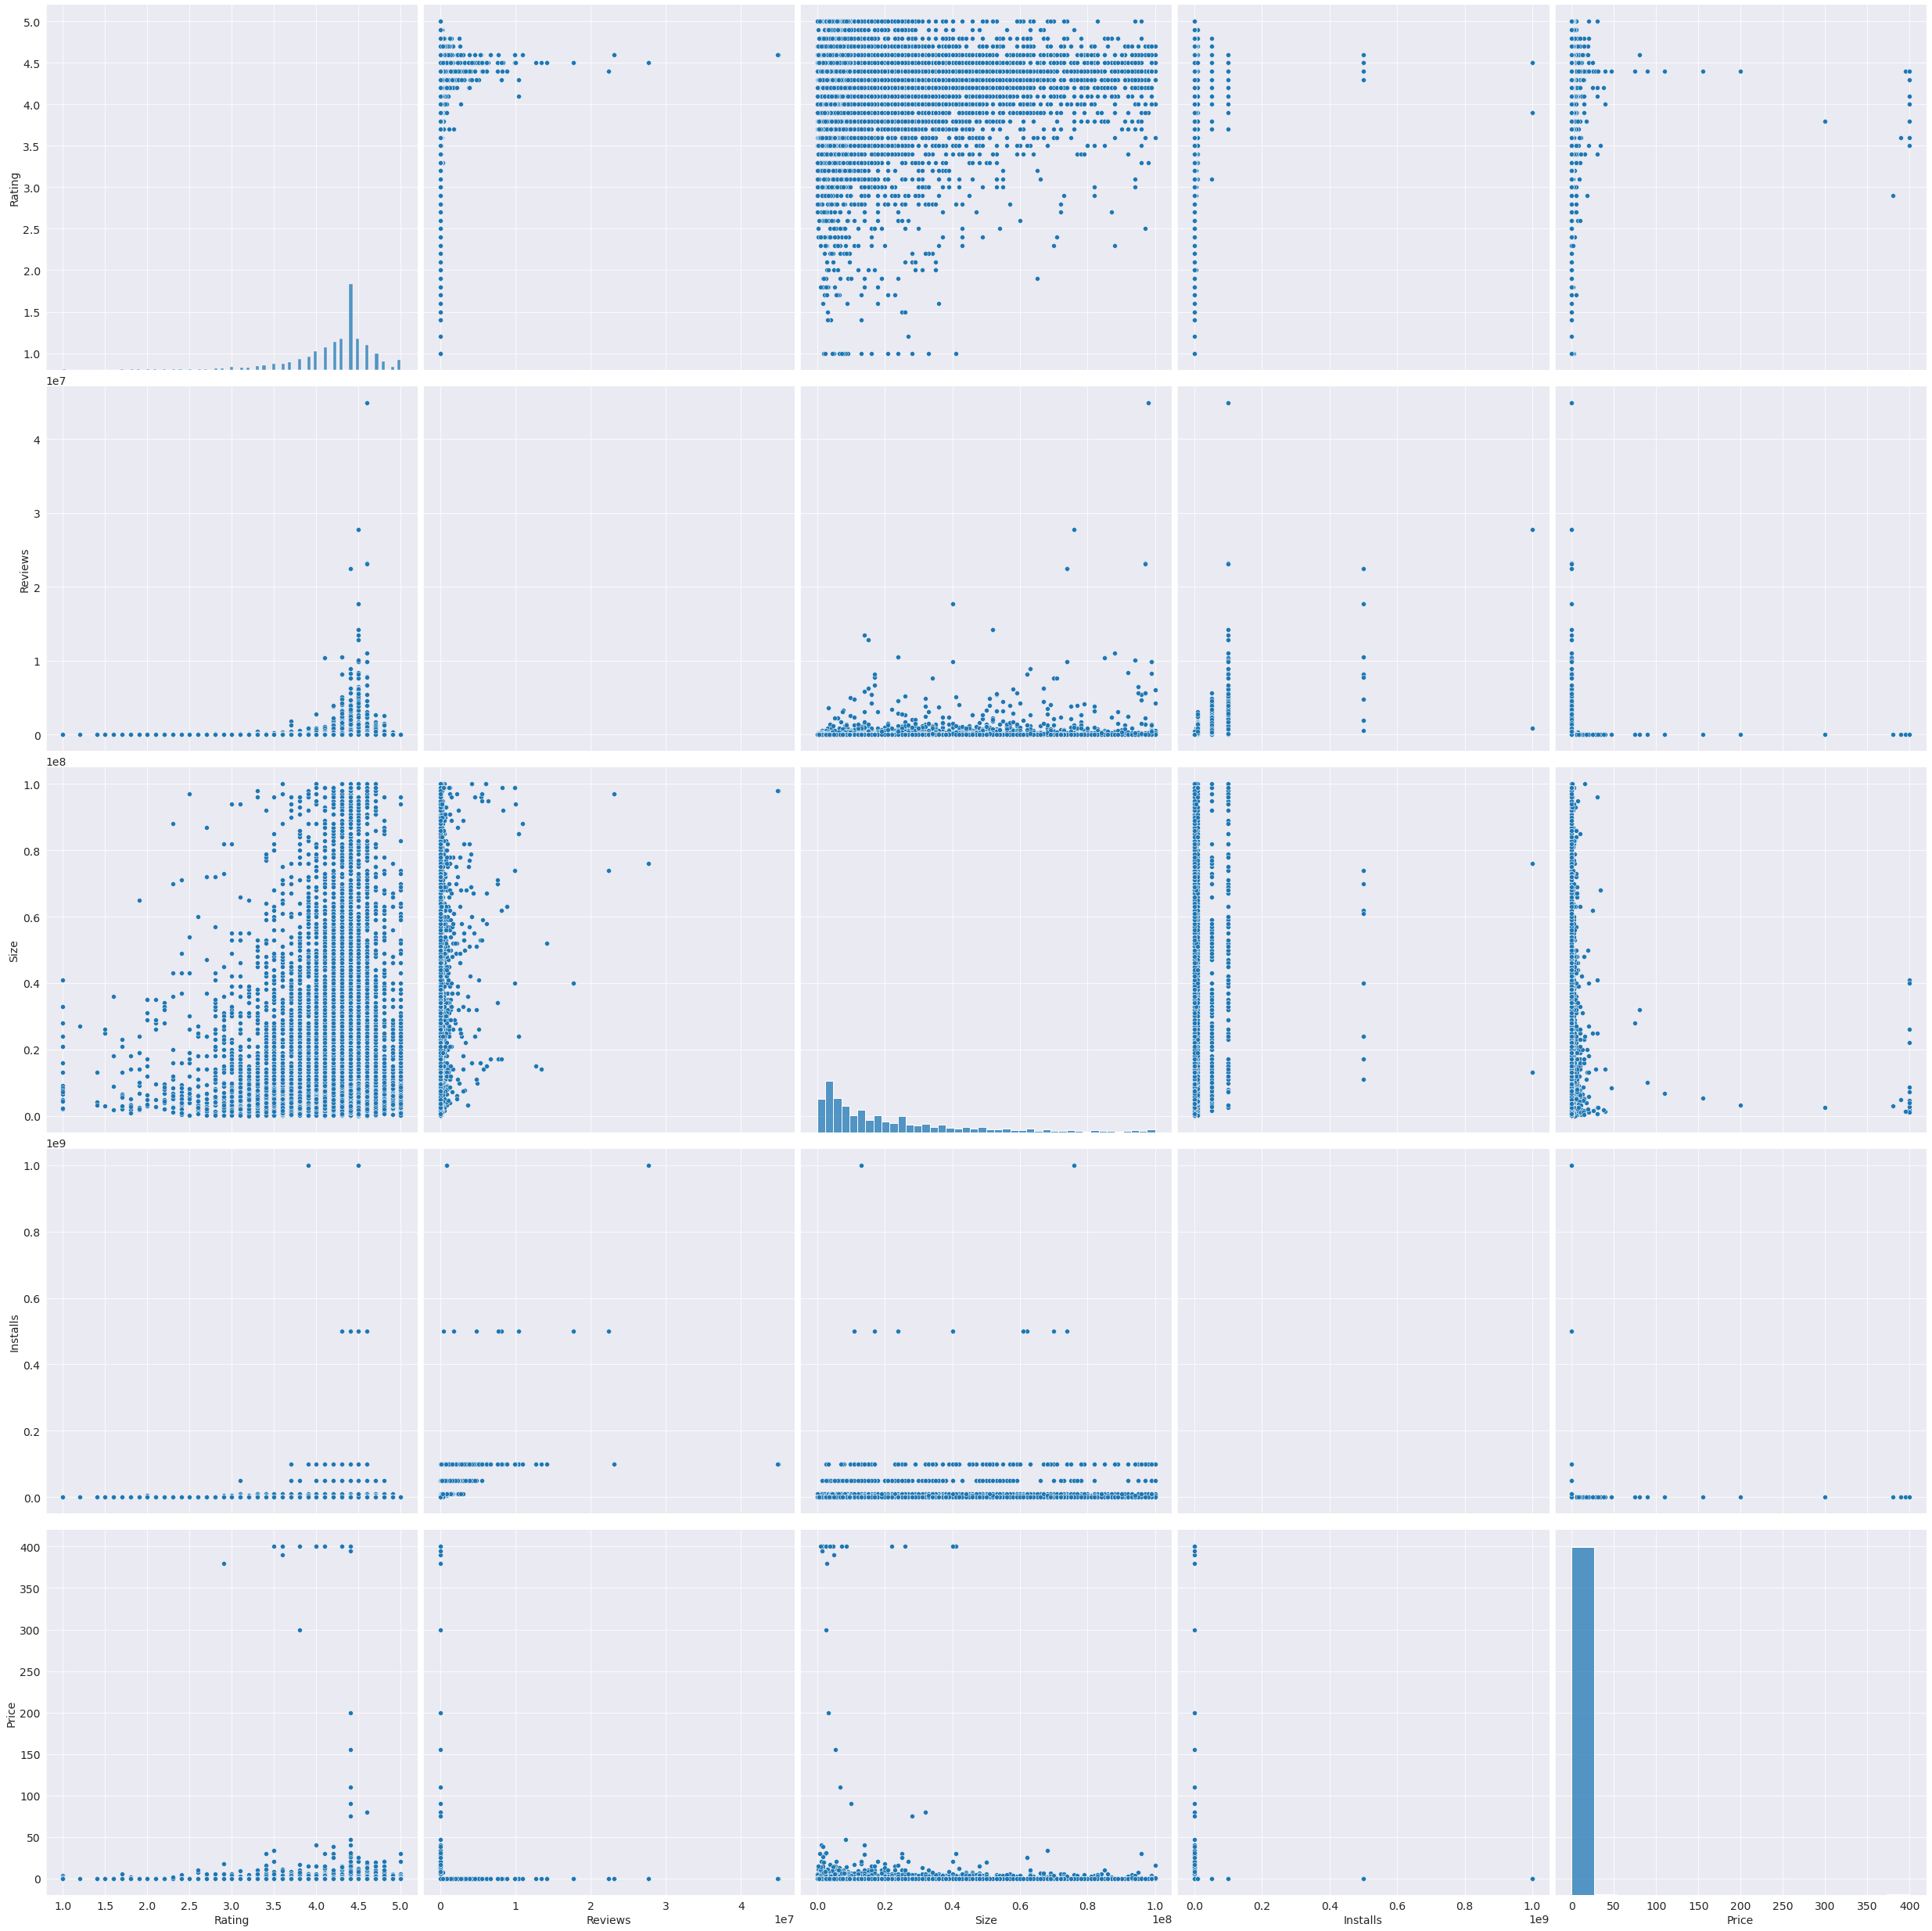

In [92]:
sns.pairplot(df, size=7)

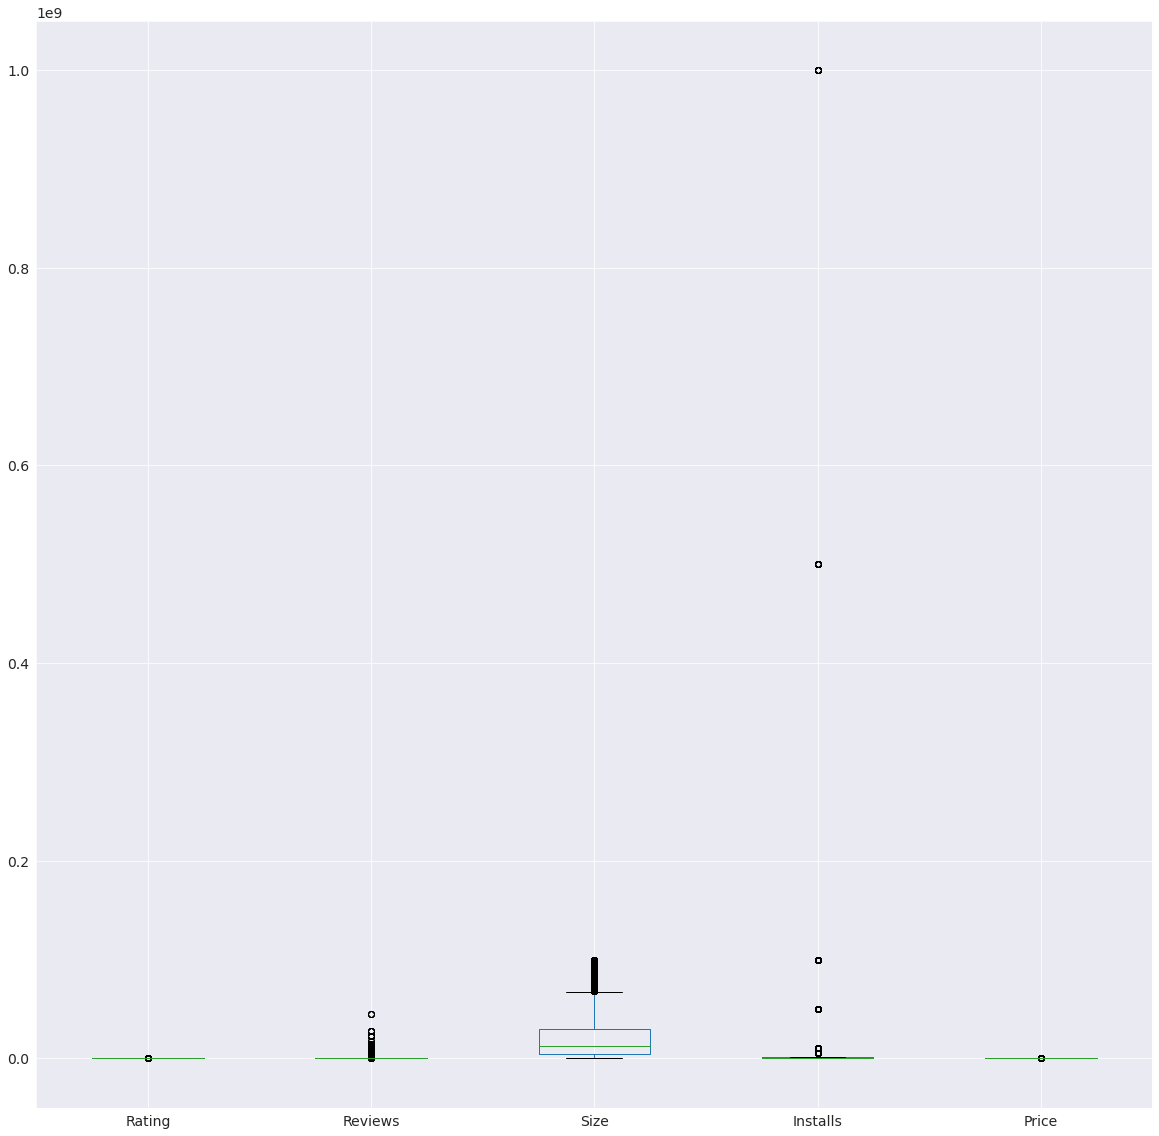

In [93]:
# Plot a Boxplot
plt.figure(figsize=(20,20))
df.boxplot()

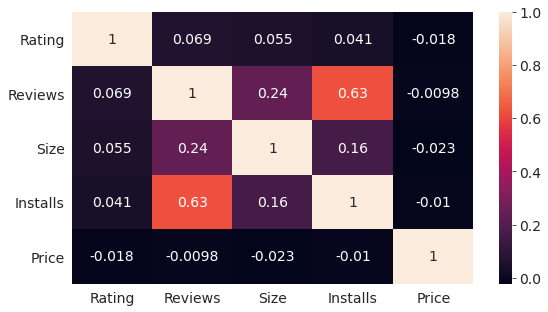

In [94]:
# Plot a heatmap
sns.heatmap(df.corr(),annot=True)

In [58]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

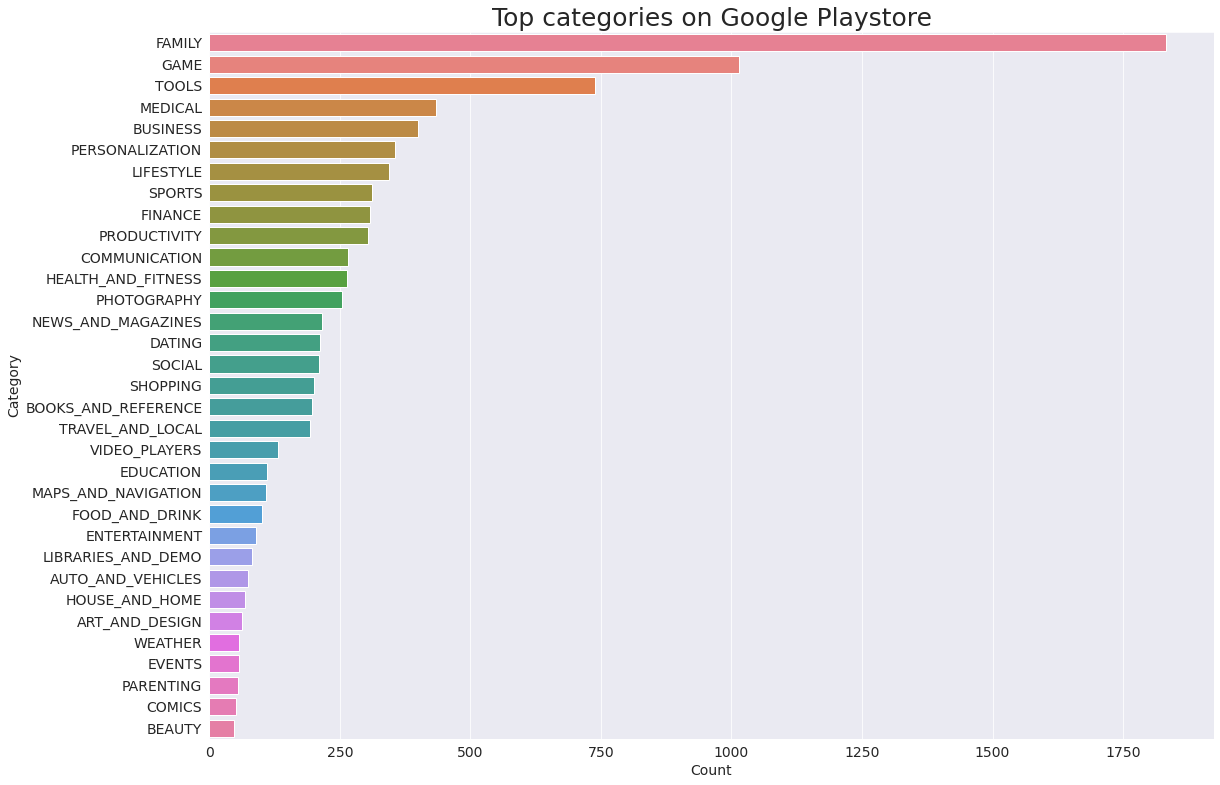

In [59]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

* category of Apps from the ‘Content Rating’ column is found more on the play store

In [61]:
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

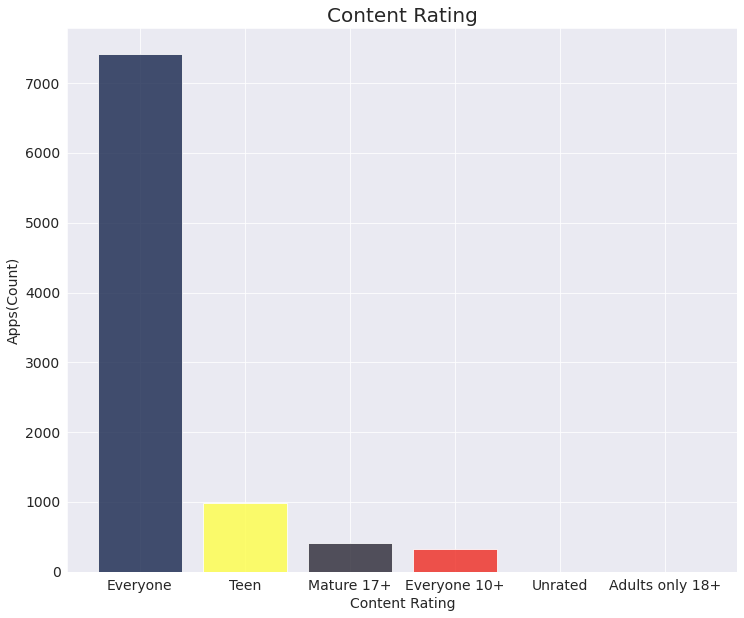

In [62]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

* distribution of the ratings of the data frame.

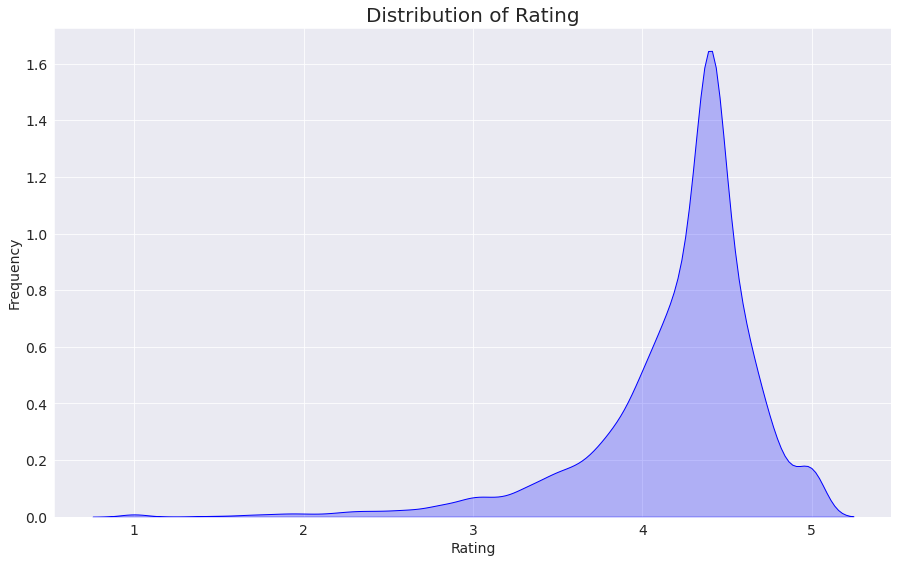

In [64]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

* apps in the play store are paid and free

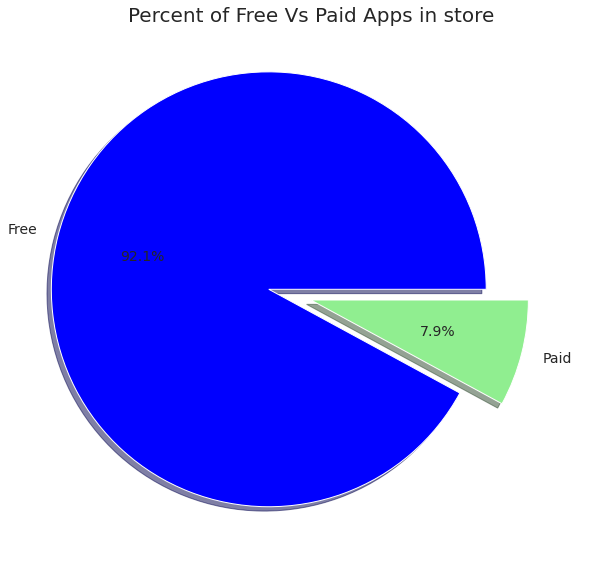

In [65]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

* From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.


---



---



---



* App’s have the most number of installs

In [66]:
highest_Installs_df = df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

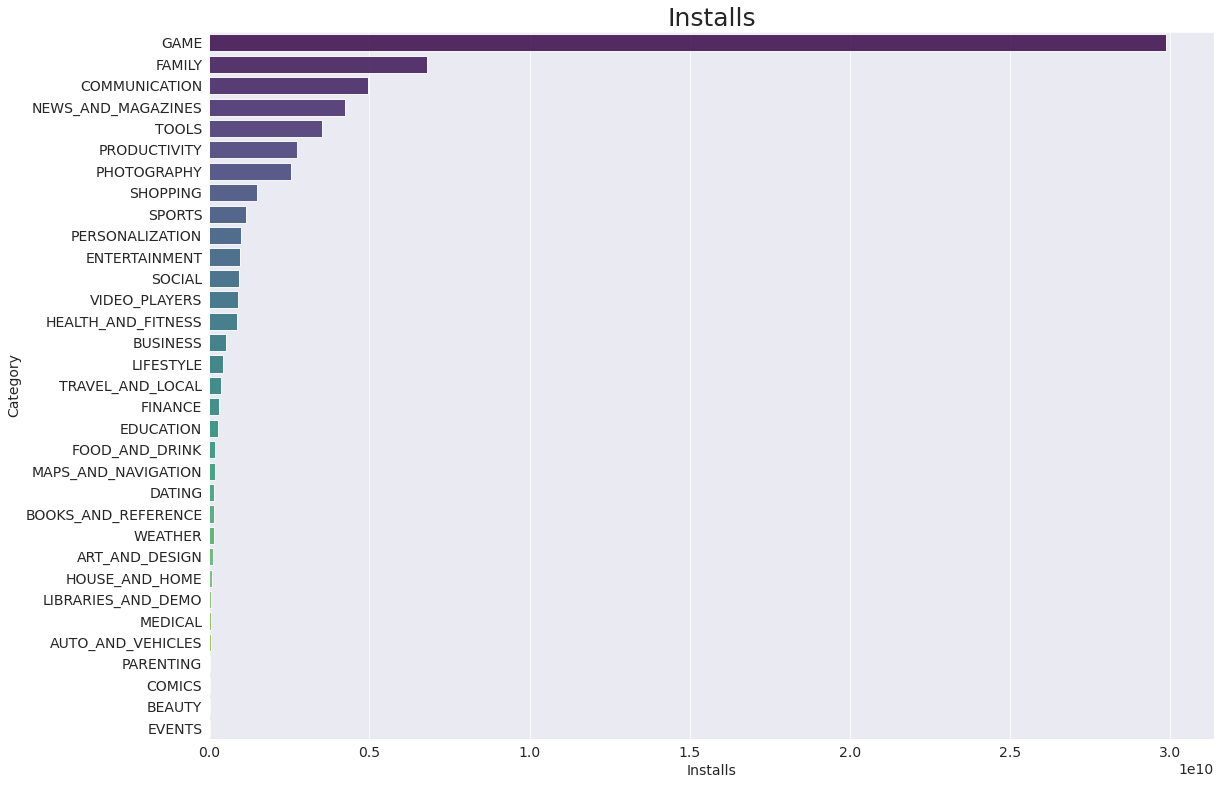

In [67]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

1. What are the Top 10 installed apps in any category?

In [68]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

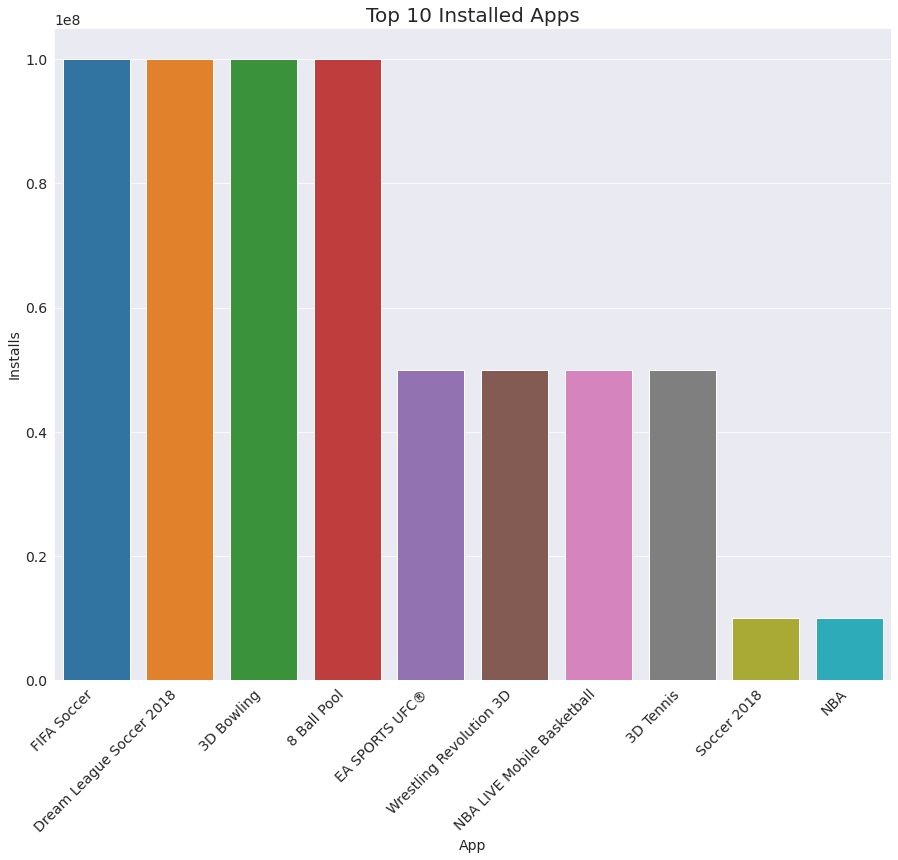

In [69]:
findtop10incategory('Sports')

* From the above graph, we can see that in the Sports category FIFA Soccer, and Dream League Soccer 2018 has the highest installs.

---




---



2. Which are the top 10 expensive Apps in the play store?

In [70]:
top10PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

In [71]:
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


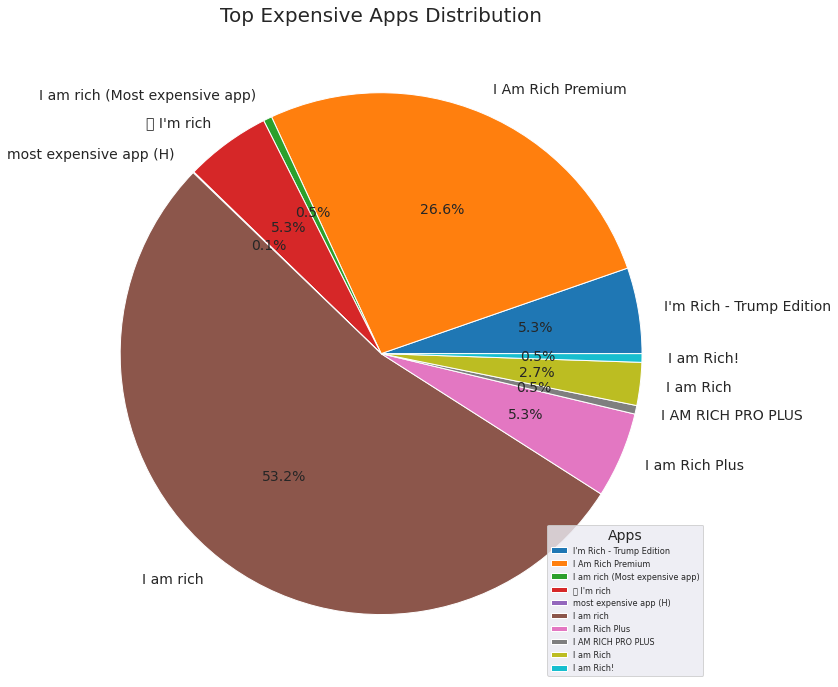

In [72]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

* From the above graph, we can interpret that the App I am rich is the most expensive app in the google play store followed by I am Rich Premium.

---



---



3. Which are the Apps with the highest number of reviews?

In [73]:
Apps_with_Highest_rev = df.sort_values(by='Reviews', ascending=False).head(20)

In [74]:
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


* From the above data frame we can interpret, and come to the conclusion that the Apps like Clash of Clans, Subway Surfers, Clash Royale, and Candy Crush Saga has the highest number of reviews on google play store.


---


---



4. What are the count of Apps in different genres?

In [75]:
topAppsinGenres = df['Genres'].value_counts().head(50)


In [76]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

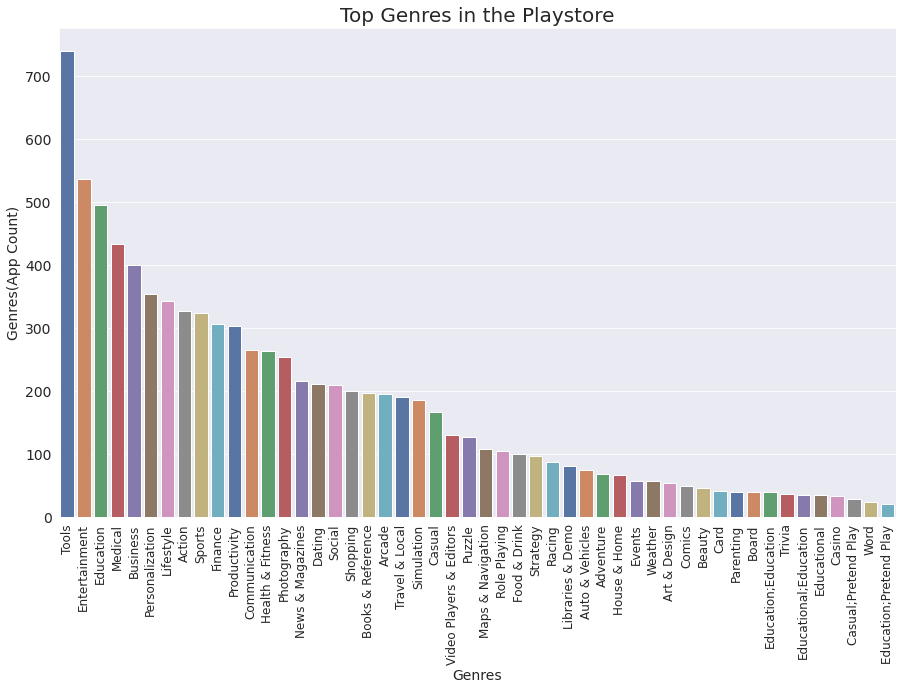

In [77]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

* plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

---



---



5. Which are the apps that have made the highest-earning?

In [78]:
Paid_Apps_df = df[df['Type'] == 'Paid']

In [79]:
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]

In [80]:
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)

In [82]:
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


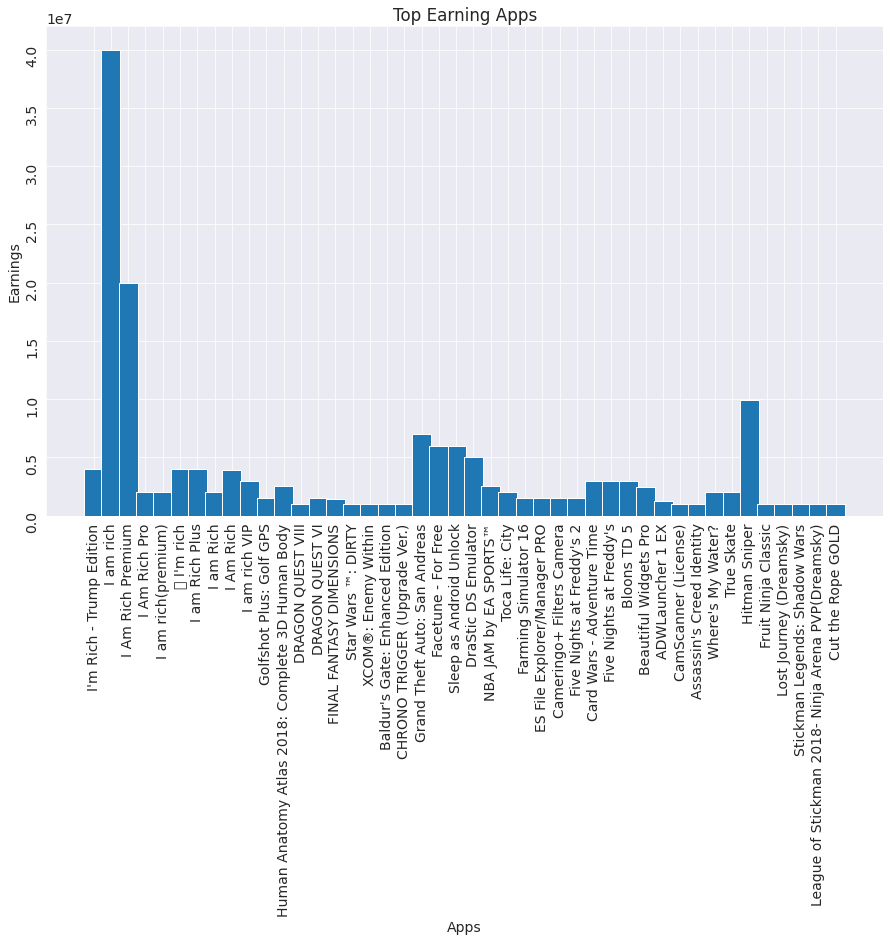

In [83]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

In [98]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity


* **Apart From project Let's Try With  to implement ML Model **

#** Machine learning Model - Random Forest Rgressor**
  The model used to train the dataset is the “Random Forest Regressor”.
The dataset was split into training and testing data and with the help of a function, the “mean absolute error” the accuracy was measured.
The model gives options to tune. It is known as hyper tuning our model to predict a better result.
Different parameters were used to get the least error.
One other approach used to get a better result is to train the model a few times and then take the median of the same. Though it is going to take a bit more time, accurate results could be obtained by doing the same.

---



---



---



In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split

In [139]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating
df["Content_Rating_NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults_only_18": 0, "Everyone": 1, "Everyone_10": 2, "Mature_17": 3, "Teen": 4}
# Numeric value for Content Rating
Adults_only_18= 0
Everyone = 1
Everyone_10= 2
Mature_17= 3
Teen =4
# Create column for "numeric" Category
df["Category_NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32


In [140]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)

In [141]:
# Features selection
features = ['Category_NUM', 'Reviews', 'Size', 'Installs', 'Price', 'Content_Rating_NUM']
X = df[features]
# Label selection
y = df.Rating
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [149]:
# Loop is used to get more generalized result
total_sum = []
for i in range(10):
 # Hypertuning of parameters for better prediction
 forest_model = RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=10)
 forest_model.fit(X, y)
 #  For testing purpose
 forest_model.fit(train_X, train_y)
 # Pass values to get prediction for ratings
 value1 = df['Category_NUM']
 value2 = df['Reviews']
 value3 = df['Size']
 value4 = df['Installs']
 value5 = df['Price']
 value6 = df['Content_Rating_NUM']
 forest_pred = forest_model.predict([[4,100000,20,1000000,5,1]])
 total_sum.append(forest_pred)
 # For testing purpose
 forest_pred = forest_model.predict(test_X)
 print(mean_absolute_error(forest_pred, test_y)) 
  

0.30775147092919075
0.3082782862703296
0.3080584060075981
0.3086441973822234
0.308596616019714
0.3083002739122941
0.30721424224705557
0.3078430617102824
0.30849735723142013
0.3073956828251032


In [150]:
print(round(np.median(total_sum), 2))

4.36


# ***Thanking youuu......***

---



---



---

